In [93]:
from langgraph.graph import StateGraph,START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [94]:
load_dotenv()  # take environment variables from .env file

True

In [95]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    src: float
    bpb: float
    boundary_rate: float
    summary:str





In [96]:
graph = StateGraph(BatsmanState)

In [97]:
def calculate_src(state: BatsmanState):
   sr= (state["runs"] / state["balls"]) * 100
   state["src"]=sr
   return {"src":sr}

In [98]:
def calculate_bpb(state: BatsmanState) :
   bpb=state["balls"] /( state["fours"]+state["sixes"])
   state["bpb"]=bpb
   return {"bpb":bpb}

In [99]:
def calculate_boundry_persent(state: BatsmanState):
    boundary_rate= ( (state["fours"]*4 + state["sixes"]*6) / state["runs"]) * 100
    state["boundary_rate"]=boundary_rate
    return {"boundary_rate":boundary_rate}
    
   

In [100]:
def summary(state: BatsmanState):
    summary_text=f"The batsman scored {state['runs']} runs off {state['balls']} balls with a strike rate of {state['src']:.2f}. He hit {state['fours']} fours and {state['sixes']} sixes, resulting in a boundary rate of {state['boundary_rate']:.2f}%."

    return {"summary":summary}



In [101]:
graph = StateGraph(BatsmanState)

In [102]:
# add nodes
graph.add_node("calculate_src", calculate_src)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundry_persent", calculate_boundry_persent)
graph.add_node("summary",  summary)

In [103]:
# entry points
graph.add_edge(START, "calculate_src")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundry_persent")

# connect calculations to summary
graph.add_edge("calculate_src", "summary")
graph.add_edge("calculate_bpb", "summary")
graph.add_edge("calculate_boundry_persent", "summary")

# connect summary to end
graph.add_edge("summary", END)

In [104]:
workflow=graph.compile()

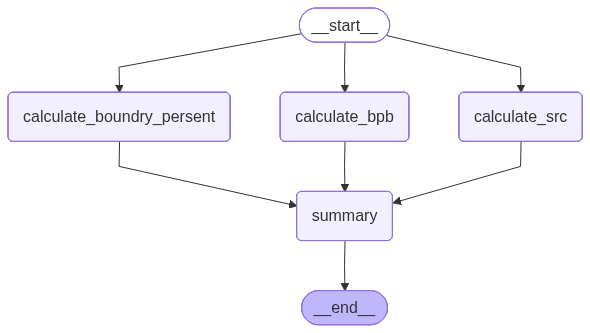

In [105]:
graph.compile()

In [106]:
initial_state: BatsmanState = {
    "runs": 150,
    "balls": 120,
    "fours": 15,
    "sixes": 5,

}
workflow.invoke(initial_state)

{'runs': 150,
 'balls': 120,
 'fours': 15,
 'sixes': 5,
 'src': 125.0,
 'bpb': 6.0,
 'boundary_rate': 60.0,
 'summary': <function __main__.summary(state: __main__.BatsmanState)>}